In [8]:
import ultralytics
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

print(ultralytics.__version__)

8.3.29



image 1/1 C:\Users\expde\Documents\projs\py\dfacescan\face-detection\testyolov8\..\minidataset\image051.jpg: 448x640 15 persons, 8 chairs, 2 dining tables, 185.0ms
Speed: 4.0ms preprocess, 185.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


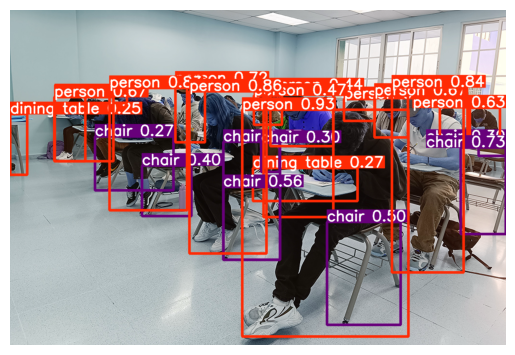

In [9]:
# Cargar el modelo preentrenado
model = YOLO("./model/yolov8s.pt")

# Realizar una predicción en una imagen
results = model("../minidataset/image051.jpg")

# Obtener la imagen procesada con las detecciones de `results`
# results[0] obtiene el primer (y en este caso único) resultado
annotated_img = results[0].plot()

# Mostrar la imagen con Matplotlib
plt.imshow(annotated_img)
plt.axis("off")  # Ocultar los ejes
plt.show()


image 1/1 C:\Users\expde\Documents\projs\py\dfacescan\face-detection\testyolov8\..\minidataset\data\classroom\test\recording_2024-10-30_13-27-20\frame-008.jpg: 384x640 18 persons, 2 backpacks, 1 suitcase, 8 chairs, 4 laptops, 1 mouse, 1 book, 899.7ms
Speed: 2.5ms preprocess, 899.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


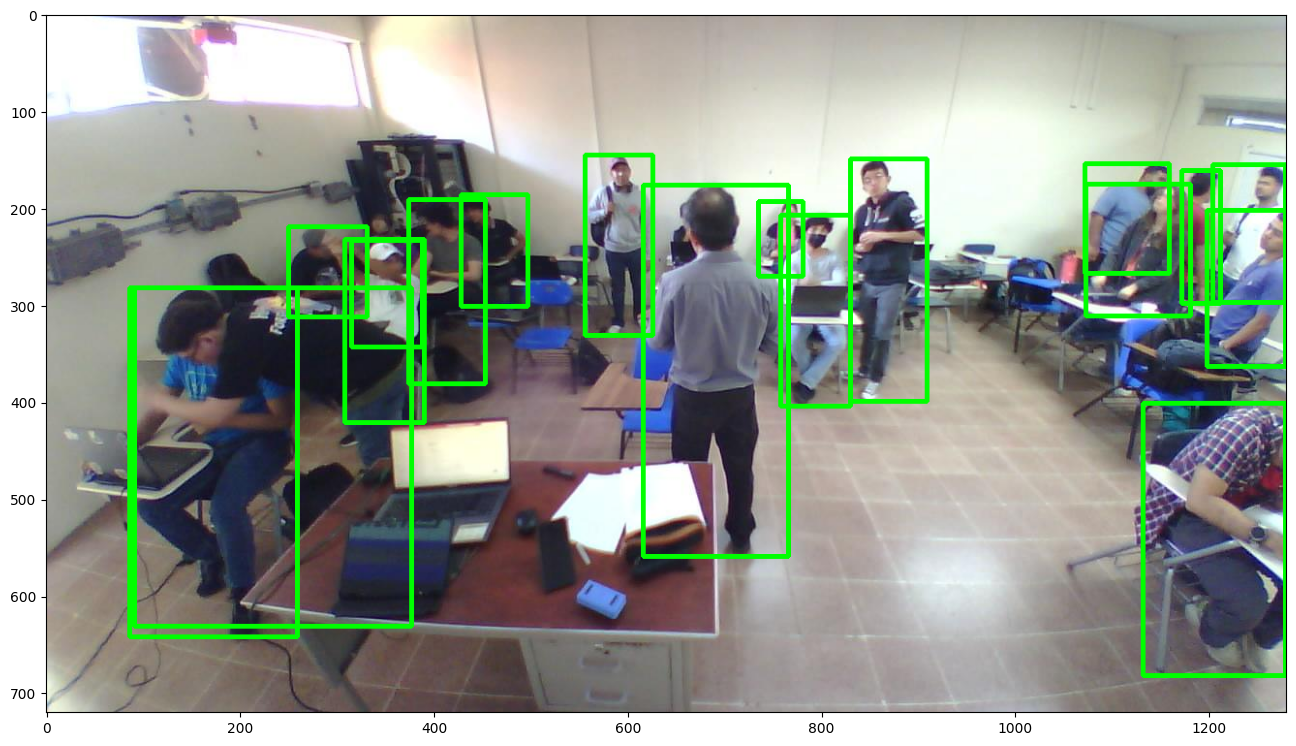

In [20]:
# Cargar el modelo YOLOv8 preentrenado
model = YOLO("./model/yolov8l.pt")

# Realizar una predicción en una imagen
#img_path:str = "../minidataset/data/classroom/test/img-01.jpg"
img_path:str = "../minidataset/data/classroom/test/recording_2024-10-30_13-27-20/frame-008.jpg"

results = model(img_path)

# Obtener el primer resultado (suponiendo que solo procesaste una imagen)
result = results[0]

# Filtrar solo detecciones de personas (ID de clase 0 en COCO)
person_detections = [det for det in result.boxes if int(det.cls) == 0]

# Cargar la imagen original con OpenCV
image = cv2.imread(img_path)

# Dibujar los bounding boxes de personas en la imagen
for det in person_detections:
    # Bounding box en el formato [x_min, y_min, x_max, y_max]
    x_min, y_min, x_max, y_max = map(int, det.xyxy[0])

    # Dibujar el bounding box en la imagen (color verde)
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)  # Verde para personas

# Convertir la imagen de BGR (formato OpenCV) a RGB (formato Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con Matplotlib
plt.figure(figsize=(16,16))
plt.imshow(image_rgb)
plt.axis("on")  # Ocultar los ejes
plt.show()